# Univariate Visualization

# In this section we are going to show our data by using univariate visualizations

# Analysing the reasons for flight delays and cancelations

In [1]:
# importing libraries we are going to use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the file containing the data
df = pd.read_csv("Airline_Delay_Reasons.csv")

In [3]:
# showing  sample of data
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NaN
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NaN
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,NaN
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,NaN
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,NaN


In [4]:
# removind an unneeded column
df = df.drop('Unnamed: 21',axis=1)

In [5]:
# removing missing values
df = df.dropna()

In [6]:
# showing the shape of our dataframe now
df.shape

(63290, 21)

# I'm going to ignore data of 2020 because results were affected a lot by the COVID

In [7]:
# removing data from 2020
df = df[df['year']!='2020']

In [8]:
df.shape

(63290, 21)

In [9]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,0.00,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,0.00,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,0.00,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,1.98,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,0.99,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0


# Let's Analyze and Discuss the flights cancelations

# What are the most common reasons leads to cancel a flight ?

In [10]:
# setting some variables and assignmet them to get ready for plotting
wethear1 = df[' weather_ct'].sum()
nas1 = df['nas_ct'].sum()
carrier1 = df['carrier_ct'].sum()
secuirity1 =df['security_ct'].sum()
late_aircraft1 = df['late_aircraft_ct'].sum()

In [11]:
Overall = wethear1 + nas1 + carrier1 + secuirity1 + late_aircraft1

In [12]:
# getting the percentage of every value
wethear = wethear1/Overall * 100
nas = nas1/Overall * 100
carrier = carrier1/Overall * 100
secuirity = secuirity1/Overall * 100
late_aircraft = late_aircraft1/Overall * 100

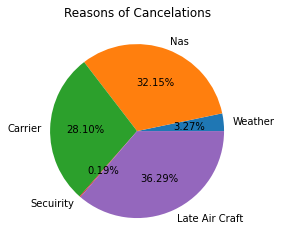

In [13]:
# plotting  a pie chart showing the percentages of reasons of cancelations
X = ['Weather','Nas', 'Carrier', 'Secuirity','Late Air Craft']
Y = [wethear1, nas1, carrier1, secuirity1, late_aircraft1]
plt.pie(Y, labels=X, autopct='%1.2f%%')
plt.title('Reasons of Cancelations')
plt.show();

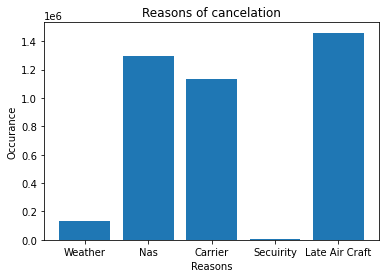

In [14]:
# plotting  a bar chart showing the amount of each reason of cancelations
plt.bar(X, Y);
plt.title("Reasons of cancelation");
plt.xlabel('Reasons');
plt.ylabel('Occurance');

# Late Air Craft is the most common reason and then Carrier

# Conclusions:
    1. The main and most reasonable reason for canceling flights is the late air craft
    2. secuirity and weather have a very small percentage so they don't contribute a lot and they aren't a great reasons for canceling flights

# Let's Analyze and Discuss the flights delay

# what are the most commom reasons lead to delay a flight ?

In [15]:
wethear2 = df['weather_delay'].sum()
nas2 = df['nas_delay'].sum()
carrier2 = df[' carrier_delay'].sum()
secuirity2 = df['security_delay'].sum()
late_aircraft2 = df['late_aircraft_delay'].sum()

In [16]:
Overall = wethear2 + nas2 + carrier2 + secuirity2 + late_aircraft2

In [17]:
wethear = wethear2/Overall * 100
nas = nas2/Overall * 100
carrier = carrier2/Overall * 100
secuirity = secuirity2/Overall * 100
late_aircraft = late_aircraft2/Overall * 100

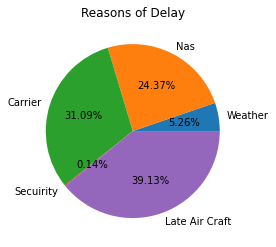

In [18]:
# plotting  a pie chart showing the percentages of reasons of delaying
X = ['Weather','Nas', 'Carrier', 'Secuirity','Late Air Craft']
Y = [wethear2, nas2, carrier2, secuirity2, late_aircraft2]
plt.pie(Y, labels=X, autopct='%1.2f%%')
plt.title('Reasons of Delay')
plt.show();

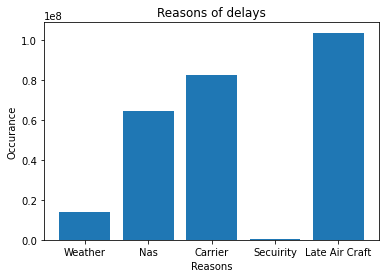

In [19]:
# plotting  a bar chart showing the amount of each reasons of delaying
plt.bar(X, Y);
plt.title("Reasons of delays");
plt.xlabel('Reasons');
plt.ylabel('Occurance');

# The most reasons of delaying are Late Air Craft, Carrier, and Nas

# Conclusions:
    1. The main and most reasonable reason for delaying flights is the late air craft too
    2. secuirity also has a very small percentage so it's almost don't contribute in delaying but here we can see the the weather has more percentage in delaying than cancelation which means it's a reason for delaying sometimes

# Now lets see if some cities has more delays than the others

# which cities has the more number of delays because of the weather ?

In [20]:
df['city'] = df['airport_name'].str.split(',').str[-1].str.split(':').str[0]

In [21]:
city_delays = df[['city','weather_delay']].groupby('city').sum().reset_index().sort_values('weather_delay',ascending=False)

In [22]:
city_delays = city_delays.iloc[:20]

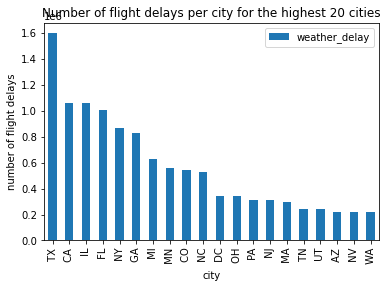

In [23]:
# plotting  a bar chart showing the amount of delays because of the weather for each city
city_delays.plot.bar(x='city',y='weather_delay');
plt.ylabel("number of flight delays");
plt.title('Number of flight delays per city for the highest 20 cities');
plt.show();

# Texas has the most number of delayed flights

# Conclusions:
It's clear here that in (TX) which is Texas, US , the number of delaying flights is more than the other cities which can means that Texas has a bad weather or something

# which Airlines have more arrivals in time an more arrivals after delayed ?

In [24]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,city
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NM
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NY
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,TX
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,GA
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,TX


In [25]:
x = df.groupby(['carrier_name'])['arr_flights'].sum()

In [26]:
x.sort_values(ascending = False, inplace = True)

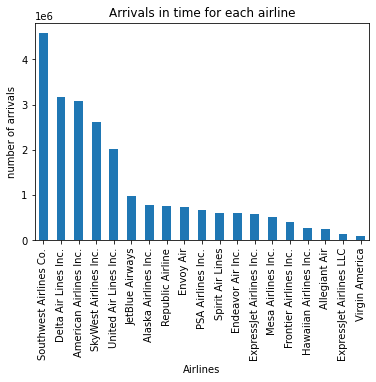

In [27]:
# plotting  a bar chart showing the amount of arrivals on time for each airline
x.plot(kind='bar');
plt.title("Arrivals in time for each airline");
plt.xlabel('Airlines');
plt.ylabel('number of arrivals');

# Conclusion:
    we can see that Southwest Airlines Co. has the greatest nummber of arrival flights whithout delaying
    Virgin America has the least number

In [28]:
y = df.groupby(['carrier_name'])['arr_del15'].sum()

In [29]:
y.sort_values(ascending = False, inplace = True)

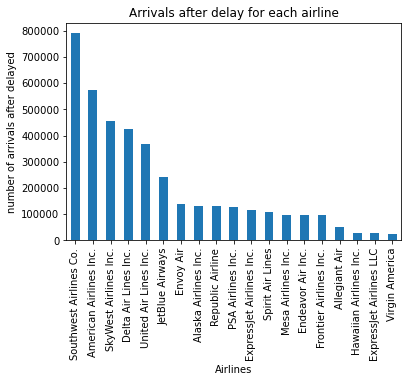

In [30]:
# plotting  a bar chart showing the amount of arrivals after delay for each airline
y.plot(kind='bar');
plt.title("Arrivals after delay for each airline");
plt.xlabel('Airlines');
plt.ylabel('number of arrivals after delayed');

# Conclusion:
    We can also find that Southwest Airlines Co. has the greatest number of arrivals after delaying which can mean that this Airlines has the greatest numbe of overall flights

In [31]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,city
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NM
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NY
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,TX
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,GA
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,TX


In [32]:
z = df['carrier_name'].value_counts()

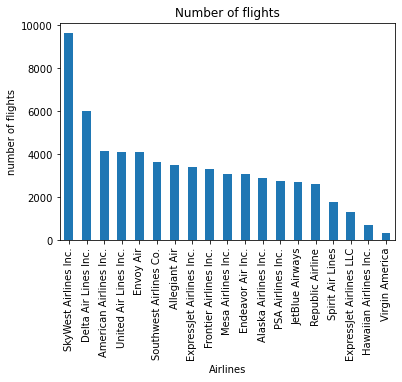

In [33]:
# plotting  a bar chart showing the total number of arrivals for each airline
z.plot(kind='bar');
plt.title("Number of flights");
plt.xlabel('Airlines');
plt.ylabel('number of flights');

# Conclusion:
    Yes, it's clear that there's a variety in the total numbers of flights in each company

In [34]:
x = df.groupby(['carrier_name'])['arr_flights'].mean()

In [35]:
x.sort_values(ascending = False, inplace = True)

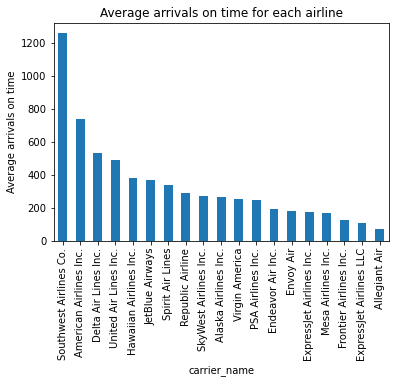

In [36]:
# plotting  a bar chart showing the average of arrivals on time for each airline
x.plot(kind='bar', ylabel = 'Average arrivals on time');
plt.title("Average arrivals on time for each airline");

# Conclusion:
    Now it's much better to compare the averages

In [37]:
y = df.groupby(['carrier_name'])['arr_del15'].mean()

In [38]:
y.sort_values(ascending = False, inplace = True)

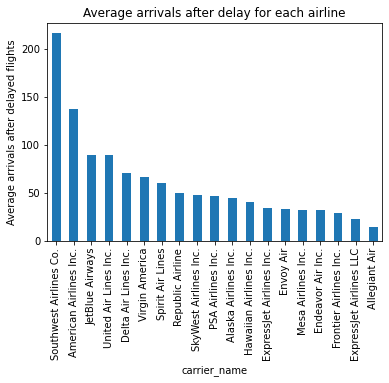

In [39]:
# plotting  a bar chart showing the average of arrivals after delay for each airline
y.plot(kind='bar', ylabel = 'Average arrivals after delayed flights');
plt.title("Average arrivals after delay for each airline");

# Bivariate Visualization

# now we are going to explore data using bivariate visualizations

# Now lets take a look to see if there is a relation between the number of delayings and the months of the year

In [40]:
df_weather = df[[' month', 'weather_delay']].groupby(' month').sum().reset_index()

In [41]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,city
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NM
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NY
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,TX
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,GA
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,TX


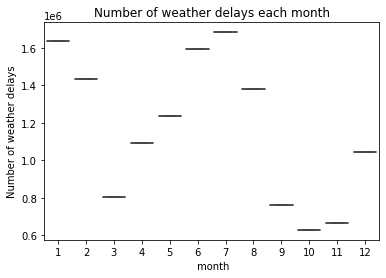

In [42]:
# plotting  a boxplot showing the amount of weather delays for each month
import seaborn as sb
sb.boxplot(data = df_weather, x = ' month', y = 'weather_delay')
plt.ylabel("Number of weather delays");
plt.title("Number of weather delays each month");


# Conclusions:
    We can notice that in months like June(6), July(7), which are the summer season, there are a large number of delaying which means the weather of summer affects the delaying numbers
    
    we can also see the same for January(1) and February(2) which are in winter
    
    but for spring and autumn, it seems to be better

# Multivariate Visualization

# now we are going to use multivariate visualizations to see more about this data

In [43]:
df.groupby(['carrier_name']).late_aircraft_delay.mean().sort_values()

carrier_name
Allegiant Air                418.773181
ExpressJet Airlines LLC      533.576037
Hawaiian Airlines Inc.       551.073509
Alaska Airlines Inc.         715.526352
Envoy Air                    843.156311
ExpressJet Airlines Inc.     920.391011
Endeavor Air Inc.            986.132401
Frontier Airlines Inc.       988.429650
Mesa Airlines Inc.          1039.483290
Spirit Air Lines            1169.039292
Republic Airline            1250.127586
Virgin America              1345.830028
Delta Air Lines Inc.        1385.014819
SkyWest Airlines Inc.       1414.651993
PSA Airlines Inc.           1625.391399
United Air Lines Inc.       2523.824740
JetBlue Airways             2706.395212
American Airlines Inc.      3307.328061
Southwest Airlines Co.      5282.455169
Name: late_aircraft_delay, dtype: float64

In [44]:
df.groupby(['carrier_name']).late_aircraft_delay.mean().sort_values()[-4:]

carrier_name
United Air Lines Inc.     2523.824740
JetBlue Airways           2706.395212
American Airlines Inc.    3307.328061
Southwest Airlines Co.    5282.455169
Name: late_aircraft_delay, dtype: float64

In [45]:
top_index = df.groupby(['carrier_name']).late_aircraft_delay.mean().sort_values()[-4:].index

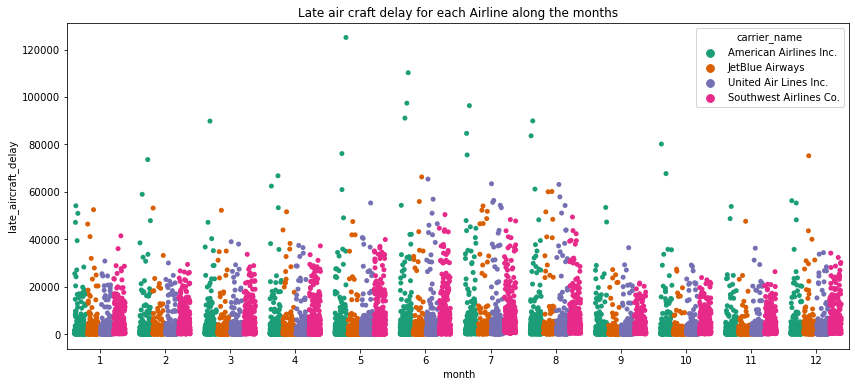

In [46]:
import seaborn as sb
plt.figure(figsize = [14,6]);
sb.stripplot(data = df.query('carrier_name in @ top_index'), x = ' month', y = 'late_aircraft_delay', hue = 'carrier_name', jitter = 0.35, dodge = True, palette = 'Dark2');
plt.title('Late air craft delay for each Airline along the months');

# Months like June, July and August have higher delays because of air craft than other months, and Southwest Airlines usually has the higher number

In [47]:
top_index = df.groupby(['year']).late_aircraft_delay.mean().sort_values()[-4:].index

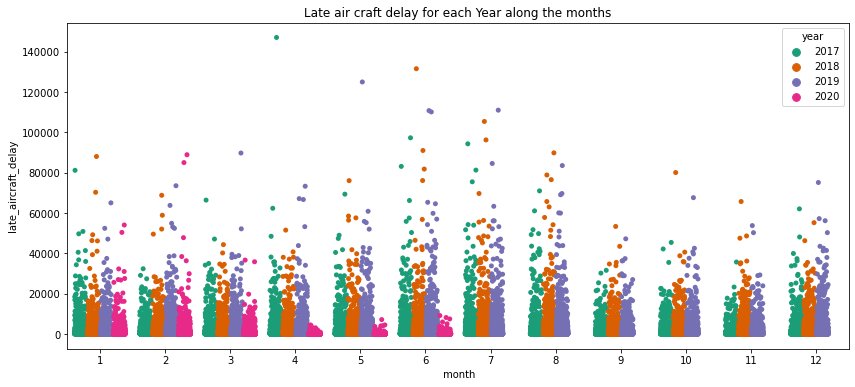

In [48]:
plt.figure(figsize = [14,6]);
sb.stripplot(data = df.query('year in @ top_index'), x = ' month', y = 'late_aircraft_delay', hue = 'year', jitter = 0.35, dodge = True, palette = 'Dark2');
plt.title('Late air craft delay for each Year along the months');

# Months like June, July and August have higher delays because of air craft than other months , and 2019 is the year with highest delays